In this notebook, we are going tu use the [Brazilian E-commerce Dataset](https://www.kaggle.com/olistbr/brazilian-ecommerce) to do a customer segmentation. The dataset contains 100k orders from 2016 to 2018. An order might have mutiple items and each item might be fulfilled by a distinct seller.

The dataset is divided into 9 files:
<table>
  <tr>
    <th style="text-align: left;">File Name</th>
    <th style="text-align: left;">Description</th>
    <th style="text-align: left;">Number of Columns</th>
  </tr>
  <tr>
    <td style="text-align: left;">olist_customers_dataset.csv</td>
    <td style="text-align: left;">Contains information about a customer and its location    </td>
    <td style="text-align: left;">5 columns</td>
  </tr>
  <tr>
    <td style="text-align: left;">olist_geolocation_dataset.csv</td>
    <td style="text-align: left;">Contains Brazilian zip codes (sellers and customers) and its lat/lang coordinates</td>
    <td style="text-align: left;">5 columns</td>
  </tr>
  <tr>
    <td style="text-align: left;">olist_order_items_dataset.csv</td>
    <td style="text-align: left;">Contains information about the items purchased within each order  </td>
    <td style="text-align: left;">7 columns</td>
  </tr>
  <tr>
    <td style="text-align: left;">olist_order_payments_dataset.csv</td>
    <td style="text-align: left;">Contains information about the orders payment options</td>
    <td style="text-align: left;">5 columns</td>
  </tr>
  <tr>
    <td style="text-align: left;">olist_order_reviews_dataset.csv</td>
    <td style="text-align: left;">Contains information about the reviews made by the customers</td>
    <td style="text-align: left;">7 columns</td>
  </tr>
  <tr>
    <td style="text-align: left;">olist_orders_dataset.csv</td>
    <td style="text-align: left;">This is the core dataset</td>
    <td style="text-align: left;">8 columns</td>
  </tr>
  <tr>
    <td style="text-align: left;">olist_products_dataset.csv</td>
    <td style="text-align: left ;">Contains information about the products sold by Olist</td>
    <td style="text-align: left;">9 columns</td>
  </tr>
    <tr>
    <td style="text-align: left;">olist_sellers_dataset.csv</td>
    <td style="text-align: left;">Contains information about the sellers</td>
    <td style="text-align: left;">4 columns</td>
  </tr>
    <tr>
    <td style="text-align: left;">product_category_name_translation.csv</td>
    <td style="text-align: left;">Translates the productcategoryname to english </td>
    <td style="text-align: left;">2 columns</td>
  </tr>
</table>
<br><br>



Since in this project I am only focusing on customer segmentation, I will not use the file **olist_order_reviews_dataset.csv**.

# Import librarires and Load the Datasets

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


root_path = '/kaggle/input/brazilian-ecommerce/'

customers_df = pd.read_csv(root_path + 'olist_customers_dataset.csv')
items_df = pd.read_csv(root_path + 'olist_order_items_dataset.csv')
payments_df = pd.read_csv(root_path + 'olist_order_payments_dataset.csv')
orders_df = pd.read_csv(root_path + 'olist_orders_dataset.csv')
products_df = pd.read_csv(root_path + 'olist_products_dataset.csv')
sellers_df = pd.read_csv(root_path + 'olist_sellers_dataset.csv')
categories_df = pd.read_csv(root_path + 'product_category_name_translation.csv')

# Data Analysis

In [4]:
customers_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [5]:
items_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [6]:
payments_df.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [7]:
orders_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [8]:
products_df.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [9]:
sellers_df.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [10]:
categories_df.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [11]:
dataframes = {'customers': customers_df,
              'items': items_df, 
              'payments': payments_df, 
              'orders': orders_df, 
              'products': products_df, 
              'sellers': sellers_df, 
              'categories': categories_df}
for i, j in dataframes.items():
    print(f'{i:12s} dataframe: {str(len(j)):7s} rows')

customers    dataframe: 99441   rows
items        dataframe: 112650  rows
payments     dataframe: 103886  rows
orders       dataframe: 99441   rows
products     dataframe: 32951   rows
sellers      dataframe: 3095    rows
categories   dataframe: 71      rows


**Merge categories_df and product_df dataframes to use the English names**

In [12]:
# products_df contains 73 unique categories, while categories_df contains 71: that's why we use left, 
# for missing categories we keep the category name in Portuguese.
products_df = pd.merge(products_df, categories_df, on='product_category_name', how='left')
# Delete 'product_category_name' column
del products_df['product_category_name']
# Delete  the categories_df dataframe
del categories_df
# Rename the column
products_df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

**How many customers, orders, and orders per customer do we have?**

In [13]:
customers = customers_df['customer_unique_id'].nunique()
orders = orders_df.order_id.nunique()
print("number of customers:", customers)
print("number of orders:   ", orders)
print(f"number of orders per cusotmer: {orders / customers:.2f}")

number of customers: 96096
number of orders:    99441
number of orders per cusotmer: 1.03


Almost all customers made only 1 order.

**Merge all other dataframes**

In [14]:
df = pd.merge(orders_df, customers_df, on='customer_id')
df = df.merge(items_df, on='order_id')
df = df.merge(payments_df, on='order_id')
df = df.merge(products_df, on='product_id')
df = df.merge(sellers_df, on='seller_id')
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP


**Customers by state**

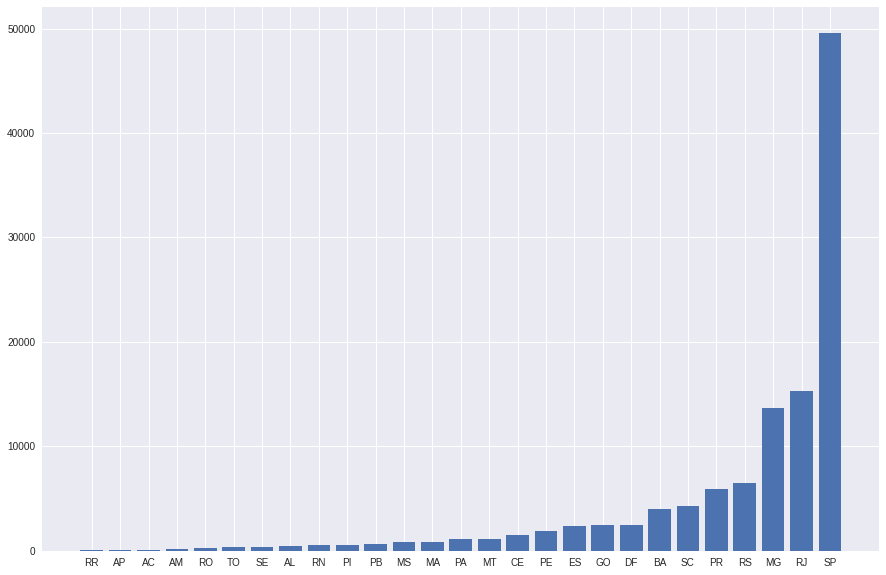

In [15]:
customer_by_state = df[['customer_unique_id', 'customer_state']].groupby('customer_state').count().reset_index()
customer_by_state = customer_by_state.sort_values(by=['customer_unique_id'])

plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.bar(customer_by_state['customer_state'], customer_by_state['customer_unique_id'])
plt.show()

We can see that most customers are from SP (I think this is Sao Paulo)

**Number of orders per year and month**

In [16]:
# We 3 new columns
df['order_purchase_year'] = pd.to_datetime(df['order_purchase_timestamp']).dt.year
df['order_purchase_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month
df['order_purchase_day'] = pd.to_datetime(df['order_purchase_timestamp']).dt.day
df['order_purchase_hour'] = pd.to_datetime(df['order_purchase_timestamp']).dt.hour

orders = df[['order_id', 'order_purchase_year', 'order_purchase_month']]
orders = orders.groupby(['order_purchase_month', 'order_purchase_year']).count().reset_index()
orders = orders.sort_values(by=['order_purchase_year', 'order_purchase_month'])
orders["period"] =  orders["order_purchase_month"].astype(str) + "/" + orders["order_purchase_year"].astype(str)
orders.head(3)

,order_purchase_month,order_purchase_year,order_id,period
16,9,2016,3,9/2016
19,10,2016,381,10/2016
22,12,2016,1,12/2016


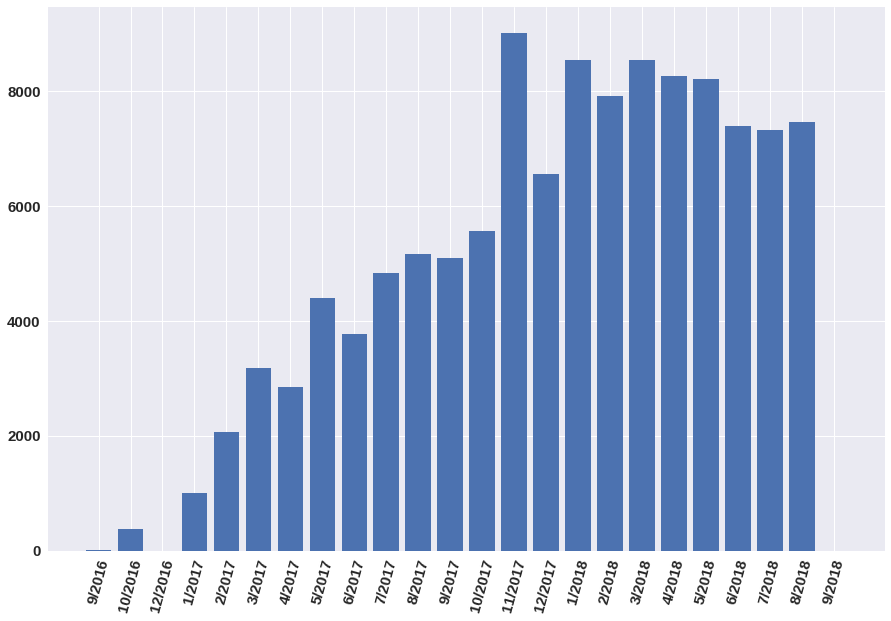

In [17]:
plt.figure(figsize=(15,10))
plt.bar(orders['period'], orders['order_id'])
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

We can see that the year 2018 was the year with the most orders, let's confirm that:

In [18]:
orders.groupby(['order_purchase_year']).sum()

,order_purchase_month,order_id
order_purchase_year,,
2016,31,385
2017,78,53539
2018,45,63677


**Top 10 categories**

In [19]:
top_categories = df[['product_category', 'order_item_id']]
top_categories = top_categories.groupby(['product_category']).sum().sort_values(by=['order_item_id'], ascending=False).reset_index()
top_categories[:10]

,product_category,order_item_id
0,bed_bath_table,14539
1,furniture_decor,12055
2,health_beauty,11426
3,sports_leisure,10279
4,computers_accessories,10186
5,housewares,9530
6,watches_gifts,6811
7,garden_tools,6129
8,telephony,5349
9,auto,5042


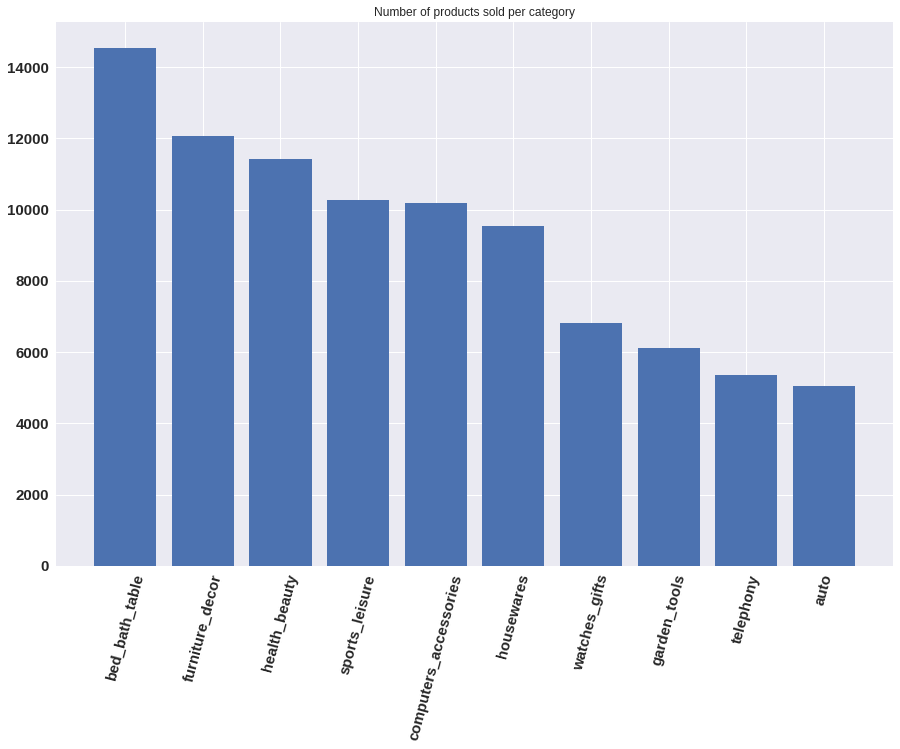

In [20]:
plt.figure(figsize=(15,10))
plt.bar(top_categories['product_category'][:10], top_categories['order_item_id'][:10])
plt.title('Number of products sold per category')
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

# Prepare the Data for the Model

Let's select the attributes that we want to keep:

In [21]:
columns = ['order_status', 'customer_state', 'order_item_id', 'price', 
           'freight_value', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 
           'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_hour']
df = df[columns]
df.head()

,order_status,customer_state,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour
0,delivered,SP,1,29.99,8.72,1,credit_card,1,18.12,2017,10,2,10
1,delivered,SP,1,29.99,8.72,3,voucher,1,2.00,2017,10,2,10
2,delivered,SP,1,29.99,8.72,2,voucher,1,18.59,2017,10,2,10
3,delivered,SP,1,29.99,7.78,1,credit_card,3,37.77,2017,8,15,18
4,delivered,SP,1,29.99,7.78,1,credit_card,1,37.77,2017,8,2,18


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_status          117601 non-null  object 
 1   customer_state        117601 non-null  object 
 2   order_item_id         117601 non-null  int64  
 3   price                 117601 non-null  float64
 4   freight_value         117601 non-null  float64
 5   payment_sequential    117601 non-null  int64  
 6   payment_type          117601 non-null  object 
 7   payment_installments  117601 non-null  int64  
 8   payment_value         117601 non-null  float64
 9   order_purchase_year   117601 non-null  int64  
 10  order_purchase_month  117601 non-null  int64  
 11  order_purchase_day    117601 non-null  int64  
 12  order_purchase_hour   117601 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 12.6+ MB


In [23]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour
count,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000
mean,1.195900,120.824783,20.045990,1.093528,2.939482,172.686752,2017.538193,6.028129,15.549757,14.760002
std,0.697706,184.479323,15.861315,0.726692,2.774223,267.592290,0.505065,3.229579,8.665830,5.325670
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,2016.000000,1.000000,1.000000,0.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.870000,2017.000000,3.000000,8.000000,11.000000
50%,1.000000,74.900000,16.290000,1.000000,2.000000,108.210000,2018.000000,6.000000,16.000000,15.000000
75%,1.000000,134.900000,21.190000,1.000000,4.000000,189.260000,2018.000000,8.000000,23.000000,19.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,2018.000000,12.000000,31.000000,23.000000


**Check for null values**

In [24]:
df.isnull().any()

order_status            False
customer_state          False
order_item_id           False
price                   False
freight_value           False
payment_sequential      False
payment_type            False
payment_installments    False
payment_value           False
order_purchase_year     False
order_purchase_month    False
order_purchase_day      False
order_purchase_hour     False
dtype: bool

## Build a full pipeline for preprocessing numerical and categorical attributes

We have 3 categorical attributes: order_status, customer_state, and payment_type. We will convert these categories using Scikit-learn's OneHotEncoder class:

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


num_attributes = ['order_item_id', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 
                  'payment_value', 'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_hour']
cat_attributes = ['order_status', 'customer_state', 'payment_type']

pipeline = ColumnTransformer([
        ('num', StandardScaler(), num_attributes),
        ('cat', OneHotEncoder(), cat_attributes),
])
df_prepared = pipeline.fit_transform(df)
df_prepared

<117601x48 sparse matrix of type '<class 'numpy.float64'>'
	with 1528813 stored elements in Compressed Sparse Row format>

In [26]:
df_prepared.shape

(117601, 48)

The output is a sparse matrix. This is useful when there are thousands of categories because onehot encoding converts these categories to a matrix full of zeros except for a single 1 per row. storing such a matrix takes to much memory, so instead a sparse matrix only stores the location of the nonzero elements.

In our case, we need to convert this sparse matrix to a numpy array because we need to perform a dimensionality reduction with PCA (PCA does not support sparse input):

In [27]:
df_prepared = df_prepared.toarray()

### Dimensionality Reduction

In [28]:
from sklearn.decomposition import PCA

# Preserving 95% of the variance
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df_prepared)
df_reduced.shape

(117601, 13)

### Clustring Using KMeans

first, we will plot the inertia as a function of the number of clusters to get a quick overview of the optimal number of clusters

In [29]:
from sklearn.cluster import KMeans

k_range = range(2, 15)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_reduced)
                for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]

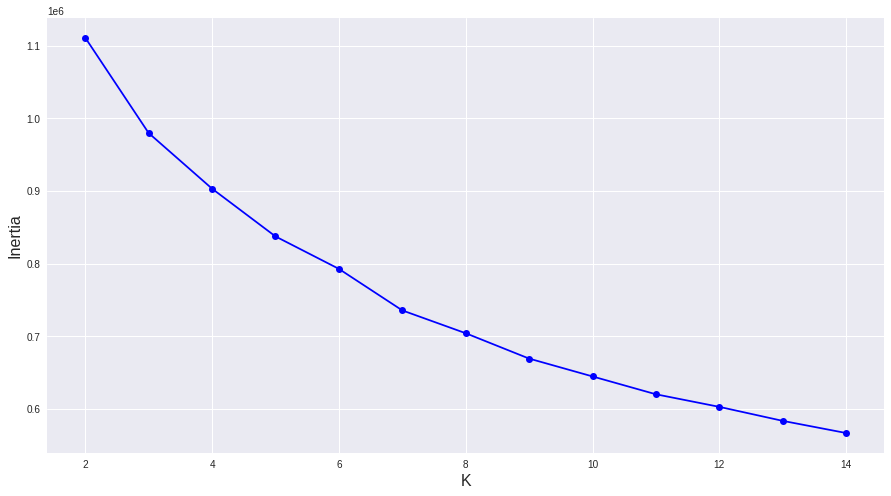

In [30]:
plt.figure(figsize=(15, 8))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('K', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.show()

It looks like that the optimal number of cluster on this inertia diagram is somewhere between 5 and 10

In [31]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(df_reduced, model.labels_)
                      for model in kmeans_per_k]

In [32]:
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]
# Best number of clusters
best_k

4

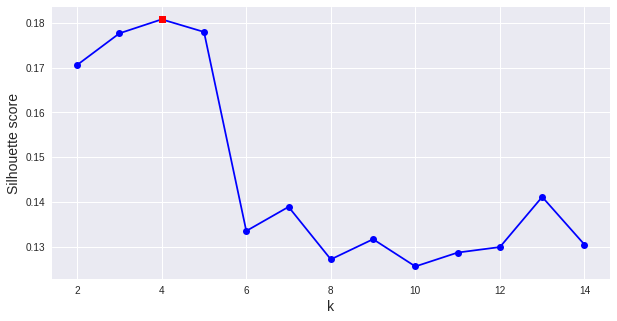

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

We can see that the best number of clusters is 4, let's pick the best model:

In [34]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(n_clusters=4, random_state=42)

In [35]:
y_pred = best_model.fit_predict(df_reduced)

In [36]:
for i in range(best_k):
    print(f"cluster {i + 1} contains: {np.sum(y_pred == i)} customers")

cluster 1 contains: 51310 customers
cluster 2 contains: 60698 customers
cluster 3 contains: 5065 customers
cluster 4 contains: 528 customers


Now that we have the clusters, we can get the average depense per cluster, the preferred category of each cluster (I removed the product categories due to the high computational cost) and so on and, for example, do some advertisements or offers specific to each cluster.

Finally, let's try to plot each cluster using TSNE

In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(df_prepared)

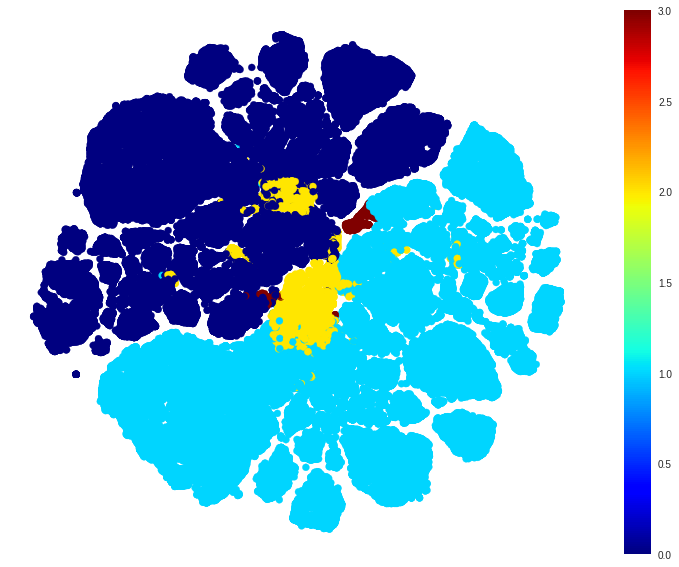

In [43]:
plt.figure(figsize=(13,10 ))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1],c=y_pred, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()